[View in Colaboratory](https://colab.research.google.com/github/KushalVenkatesh/Linear_Regression_model_on_Dunkin_Donuts_Dataset/blob/master/Linear_Regression_on_Donutdataset_(1).ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as dt

In [0]:
pwd

u'C:\\Users\\kusha'

In [0]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
import mpl_toolkits
from scipy import stats
from scipy.stats import norm

In [0]:
train = pd.read_csv("TrainingSet.csv")
test = pd.read_csv("Testset.csv")

In [0]:
train.head()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,1,317.61,496.27,682.80,0.27,818.25,788.89,567.20,557.68,579.17,Mumbai,14.3,52.1
1,2,315.19,538.85,645.77,0.17,800.65,798.97,560.37,561.20,577.59,Mumbai,15.8,54.2
2,3,317.44,514.24,661.30,0.22,795.79,801.74,579.30,584.34,575.06,Mumbai,16.3,54.8
3,4,336.62,562.98,709.35,0.20,888.29,862.33,596.66,588.34,629.96,Mumbai,16.6,56.6
4,5,331.76,558.90,635.54,0.12,801.16,811.17,593.59,599.81,586.01,Mumbai,18.3,56.9


In [0]:
train.describe()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Donut Density,Donut volume
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,375.000000,375.241402,726.166943,801.993311,0.222283,1032.105567,1015.358585,692.367623,690.589052,720.300748,26.866489,81.884246
std,216.361965,37.707571,99.436825,77.912367,0.112310,127.379942,117.488548,76.408888,79.035294,79.703218,4.589291,10.437646
min,1.000000,281.140000,487.020000,585.930000,0.050000,743.620000,644.640000,506.170000,499.170000,409.920000,14.100000,1.500000
25%,188.000000,349.040000,653.780000,754.250000,0.140000,944.790000,943.250000,641.040000,634.930000,669.960000,24.700000,76.900000
50%,375.000000,372.200000,718.260000,799.690000,0.200000,1027.100000,1008.780000,684.100000,678.050000,718.030000,27.500000,83.400000
75%,562.000000,398.970000,789.500000,842.020000,0.280000,1107.560000,1083.990000,741.530000,743.730000,766.860000,29.400000,88.100000
max,749.000000,530.020000,1056.790000,1109.180000,0.640000,1829.510000,1428.550000,1013.650000,1025.600000,990.700000,90.000000,122.600000


In [0]:
test.head()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,1,354.84,512.67,703.84,0.28,801.96,820.74,725.30,759.01,535.97,Mumbai,16.08,51.4
1,2,284.50,419.91,632.08,0.33,698.40,694.26,523.64,522.64,509.75,Mumbai,16.52,55.2
2,3,298.34,450.13,701.23,0.36,798.88,749.28,517.35,502.82,626.46,Mumbai,17.90,57.0
3,4,302.40,472.97,694.86,0.32,798.38,769.71,530.10,522.51,602.89,Mumbai,17.90,57.0
4,5,422.84,726.44,806.40,0.10,1036.23,1048.50,781.72,791.55,710.68,Mumbai,18.80,57.8


In [0]:
test.describe()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Donut Density,Donut volume
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,333.270958,392.332964,762.221707,840.392814,0.203967,1089.282051,1063.742994,722.072889,716.751272,753.590898,26.948204,81.945210
std,193.478782,54.550914,127.088277,91.493476,0.092670,150.962015,143.934316,114.194351,116.760236,87.417412,4.494664,10.593521
min,1.000000,284.500000,406.540000,632.080000,0.050000,698.400000,682.930000,510.310000,496.370000,467.470000,14.400000,51.400000
25%,165.750000,353.227500,679.695000,774.545000,0.130000,980.797500,962.987500,635.502500,629.210000,692.737500,24.337500,75.475000
50%,333.500000,381.855000,769.925000,831.195000,0.195000,1083.340000,1058.705000,703.140000,695.435000,751.805000,27.500000,83.250000
75%,500.250000,422.772500,853.495000,897.385000,0.270000,1186.655000,1156.232500,791.310000,788.210000,809.480000,29.600000,88.525000
max,668.000000,688.450000,1119.520000,1188.630000,0.500000,1588.350000,1546.450000,1302.180000,1409.790000,1096.220000,68.000000,136.000000


In [0]:
print ('The training data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The testing data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The training data has 749 rows and 13 columns
----------------------------
The testing data has 668 rows and 13 columns


In [0]:
#checking the training data set information 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 13 columns):
Donut ID                                                           749 non-null int64
Donut Estimator 1                                                  749 non-null float64
Donut Area of cross section                                        749 non-null float64
Donut Area of circumference circle                                 749 non-null float64
Donut area of central hole / Donut Area of circumscribed circle    749 non-null float64
Donut  Estimator 2                                                 749 non-null float64
Donut  Estimator 3                                                 749 non-null float64
Donut  Estimator 4                                                 749 non-null float64
Donut  Estimator 5                                                 749 non-null float64
Donut volume Estimator 6                                           749 non-null float64
Location         

In [0]:
#checking the testing data set information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 13 columns):
Donut ID                                                           668 non-null int64
Donut Estimator 1                                                  668 non-null float64
Donut Area of cross section                                        668 non-null float64
Donut Area of circumference circle                                 668 non-null float64
Donut area of central hole / Donut Area of circumscribed circle    668 non-null float64
Donut Estimator 2                                                  668 non-null float64
Donut Estimator 3                                                  668 non-null float64
Donut Estimator 4                                                  668 non-null float64
Donut Estimator 5                                                  668 non-null float64
Donut volume Estimator 6                                           668 non-null float64
Location         

In [0]:
#checking if the training data set has any missing values.
train.columns[train.isnull().any()]

Index([], dtype='object')

In [0]:
#checking if the testing data set has any missing values.
test.columns[test.isnull().any()]

Index([], dtype='object')

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


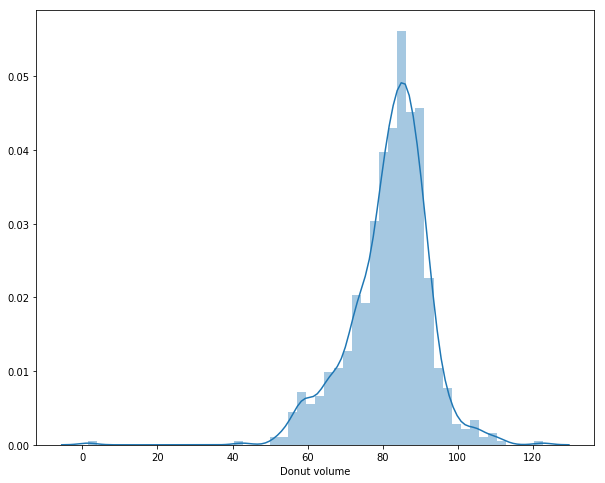

In [0]:
#checking the distribution of the target variable.
#Donut volume
sns.distplot(train['Donut volume'])

In [0]:
#confirming this skewed behavior using the skewness metric
#skewness
print "The skewness of Donut volume is {}".format(train['Donut volume'].skew())

The skewness of Donut volume is -0.985390617519


D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


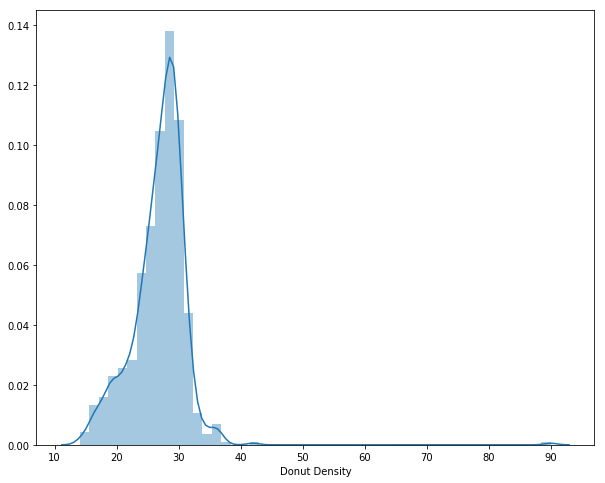

In [0]:
#checking the distribution of the target variable.
#Donut Density
sns.distplot(train['Donut Density'])

In [0]:
#Let me log transform this variable and see if this variable distribution can get any closer to normal.

The skewness value is -11.757532357043702


D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


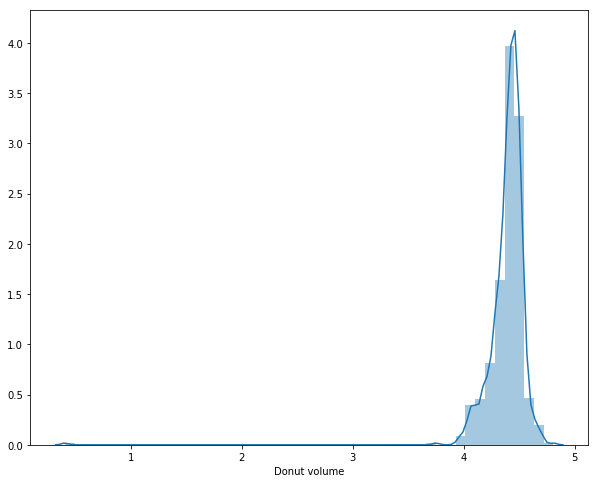

In [0]:
#Now transforming the target variable i.e. the 'Donut volume' variable
target = np.log(train['Donut volume'])
print 'The skewness value is', target.skew()
sns.distplot(target)

In [0]:
#confirming this skewed behavior using the skewness metric
#skewness
print "The skewness of Donut Density is {}".format(train['Donut Density'].skew())

The skewness of Donut Density is 3.02920350006


In [0]:
#Let me log transform this variable and see if this variable distribution can get any closer to normal.

The skewness value is -0.5699276569000437


D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


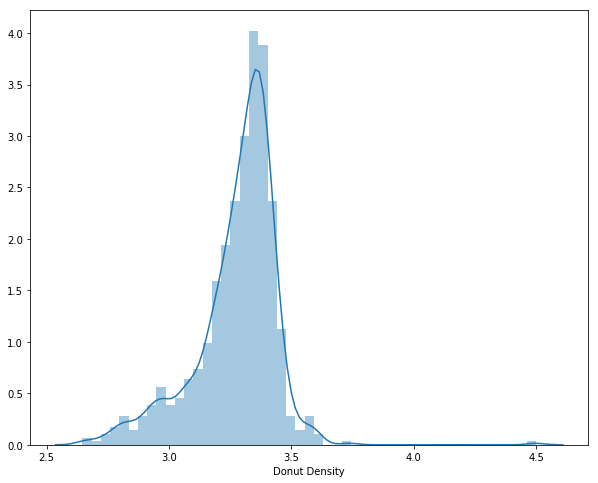

In [0]:
#Now transforming the target variable i.e. the 'Donut Density' variable
target = np.log(train['Donut Density'])
print 'The skewness value is', target.skew()
sns.distplot(target)

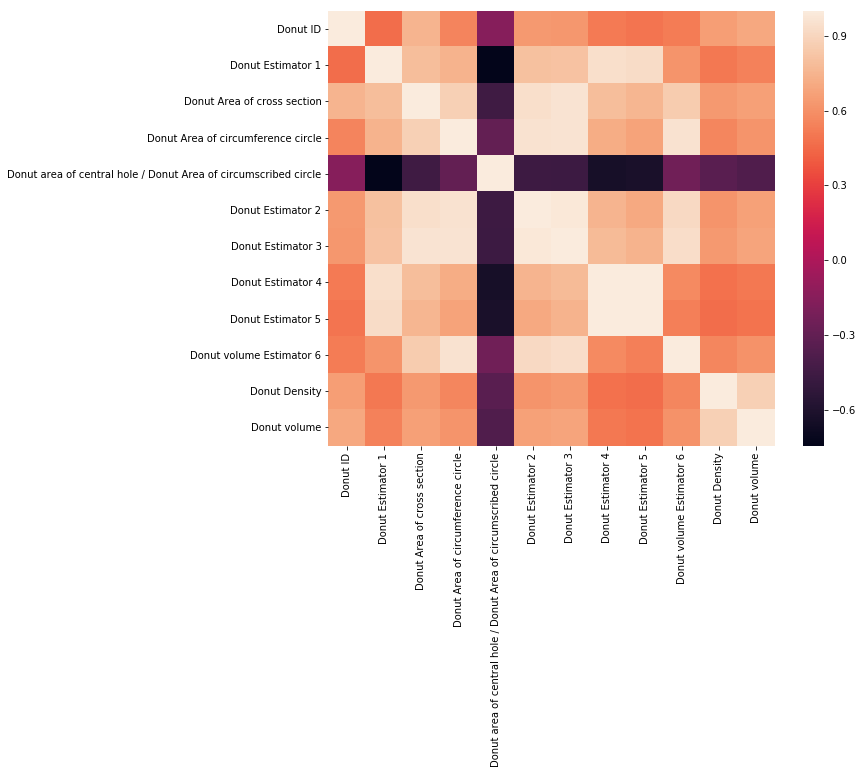

In [0]:
#correlation plot for test data
corr = test.corr()
sns.heatmap(corr)

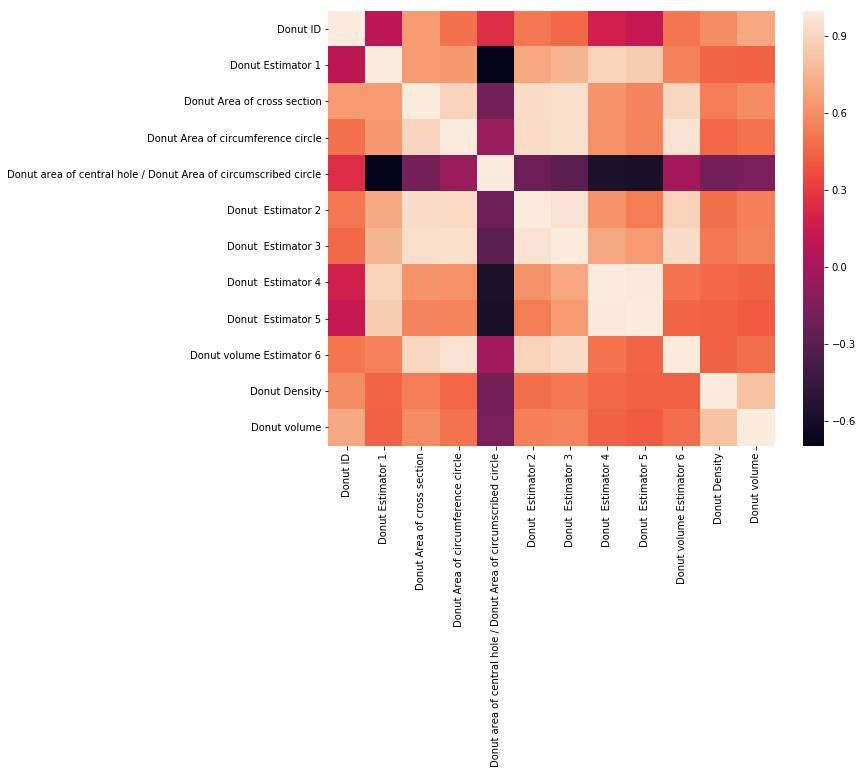

In [0]:
#correlation plot for train data
corr = train.corr()
sns.heatmap(corr)

In [0]:
print (corr['Donut volume'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Donut volume'].sort_values(ascending=False)[-5:]) #last 5 values`

(Donut volume                                                       1.000000
Donut Density                                                      0.817619
Donut ID                                                           0.704525
Donut Area of cross section                                        0.592680
Donut  Estimator 3                                                 0.561486
Donut  Estimator 2                                                 0.547625
Donut Area of circumference circle                                 0.498201
Donut volume Estimator 6                                           0.479220
Donut  Estimator 4                                                 0.442995
Donut Estimator 1                                                  0.439096
Donut  Estimator 5                                                 0.415256
Donut area of central hole / Donut Area of circumscribed circle   -0.171451
Name: Donut volume, dtype: float64, '\n')
----------------------
Donut volume Estimator

In [0]:
print (corr['Donut Density'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Donut Density'].sort_values(ascending=False)[-5:]) #last 5 values`

(Donut Density                                                      1.000000
Donut volume                                                       0.817619
Donut ID                                                           0.597937
Donut Area of cross section                                        0.542123
Donut  Estimator 3                                                 0.517715
Donut  Estimator 2                                                 0.489237
Donut Area of circumference circle                                 0.459055
Donut  Estimator 4                                                 0.458221
Donut Estimator 1                                                  0.446399
Donut  Estimator 5                                                 0.439096
Donut volume Estimator 6                                           0.433809
Donut area of central hole / Donut Area of circumscribed circle   -0.193114
Name: Donut Density, dtype: float64, '\n')
----------------------
Donut  Estimator 4   

In [0]:
train['Donut ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [0]:
test['Donut ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [0]:
pivot = train.pivot_table(index='Donut ID', values='Donut volume', aggfunc=np.median)
print(type(pivot))
pivot.sort_values

<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.sort_values of           Donut volume
Donut ID              
1                 52.1
2                 54.2
3                 54.8
4                 56.6
5                 56.9
6                 57.1
7                 58.1
8                 58.6
9                 59.1
10                59.2
11                60.1
12                60.4
13                60.6
14                60.6
15                61.1
16                61.6
17                62.4
18                63.3
19                63.5
20                63.6
21                64.7
22                64.8
23                65.2
24                65.3
25                65.7
26                65.7
27                66.4
28                66.4
29                66.9
30                66.9
...                ...
720               96.0
721               96.7
722               97.0
723               97.0
724               97.0
725               97.0
726               98.0
727               98.0
728               

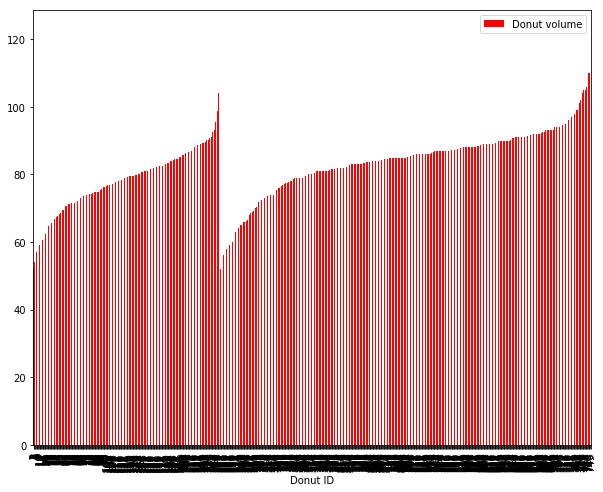

In [0]:
pivot.plot(kind='bar', color='red')

In [0]:
pivot = train.pivot_table(index='Donut ID', values='Donut Density', aggfunc=np.median)
print(type(pivot))
pivot.sort_values

<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.sort_values of           Donut Density
Donut ID               
1                  14.3
2                  15.8
3                  16.3
4                  16.6
5                  18.3
6                  16.0
7                  16.4
8                  15.4
9                  18.4
10                 18.6
11                 18.5
12                 18.9
13                 17.1
14                 18.6
15                 18.9
16                 19.5
17                 20.5
18                 20.3
19                 20.0
20                 19.3
21                 19.6
22                 19.1
23                 19.2
24                 19.9
25                 19.4
26                 20.1
27                 20.7
28                 23.1
29                 19.6
30                 21.1
...                 ...
720                31.4
721                33.5
722                25.3
723                31.5
724                31.6
725                33.3
726                31.3
7

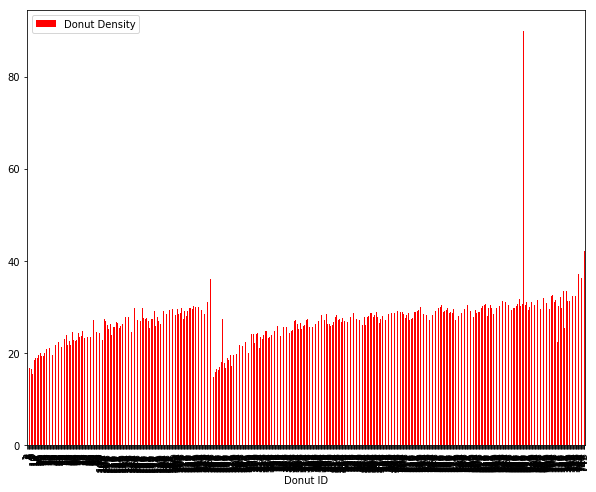

In [0]:
pivot.plot(kind='bar', color='red')

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


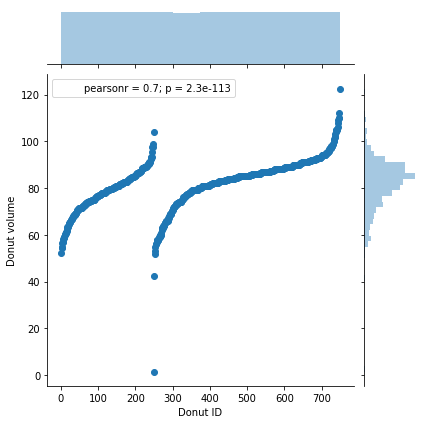

In [0]:
sns.jointplot(x=train['Donut ID'], y=train['Donut volume'])

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


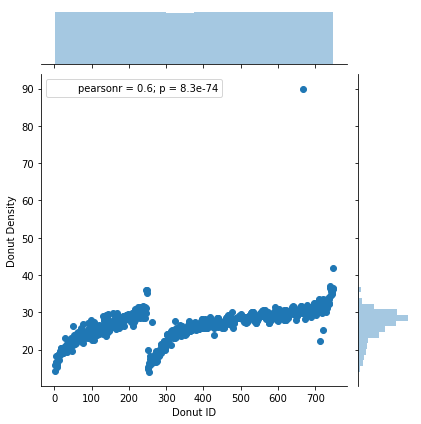

In [0]:
sns.jointplot(x=train['Donut ID'], y=train['Donut Density'])

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


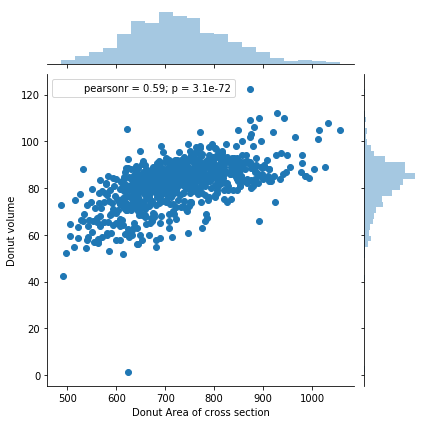

In [0]:
sns.jointplot(x=train['Donut Area of cross section'], y=train['Donut volume'])

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


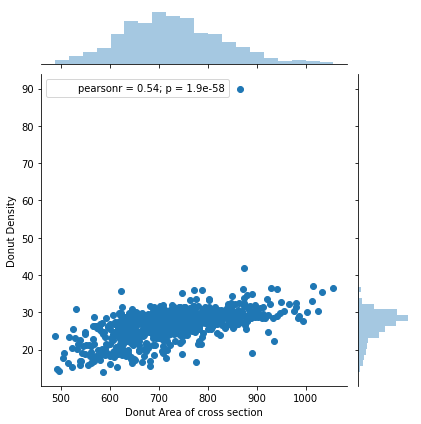

In [0]:
sns.jointplot(x=train['Donut Area of cross section'], y=train['Donut Density'])

In [0]:
data = train
print(data.shape)
data.head()

(749, 13)


,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,1,317.61,496.27,682.80,0.27,818.25,788.89,567.20,557.68,579.17,Mumbai,14.3,52.1
1,2,315.19,538.85,645.77,0.17,800.65,798.97,560.37,561.20,577.59,Mumbai,15.8,54.2
2,3,317.44,514.24,661.30,0.22,795.79,801.74,579.30,584.34,575.06,Mumbai,16.3,54.8
3,4,336.62,562.98,709.35,0.20,888.29,862.33,596.66,588.34,629.96,Mumbai,16.6,56.6
4,5,331.76,558.90,635.54,0.12,801.16,811.17,593.59,599.81,586.01,Mumbai,18.3,56.9


In [0]:
# Collecting X and Y
X = data['Donut ID'].values
Y = data['Donut volume'].values

Simple Linear Regression using ordinary least squares method:

Here is a brief description on my Model Representation:

Here we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable, X in our case and the output variable, Y in our case is called Dependent Variable. We can define this linear relationship as follows:

Y=β0+β1X;

Where the β1 is called a scale factor or coefficient and β0 is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the equation of a straight line. The equation is represented as y=mx+b with m=β1(Slope) and b=β0(Intercept).

So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

In [0]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

(0.033987411379165076, 69.13896639369428)


Now we have our coefficients.

Donut volume = 69.13896639369428 + 0.033987411379165076∗Donut ID

This is our Simple linear Regression model.

Now we will see this graphically.

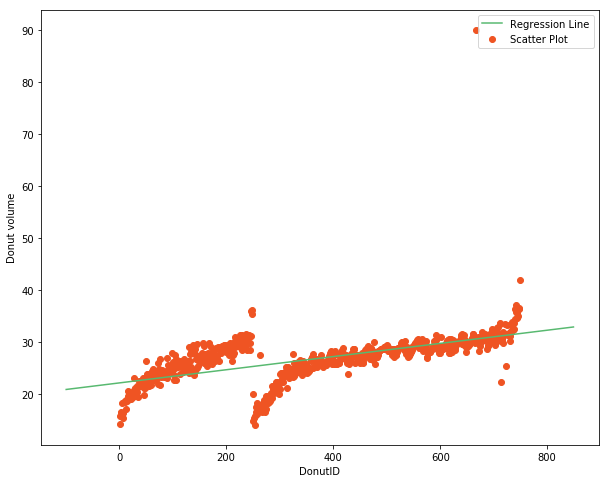

In [0]:
# Plotting the values and the Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('DonutID')
plt.ylabel('Donut volume')
#plt.xlim(-1,11) 
#plt.ylim(-100,1000000)
plt.legend()
plt.show()

In [0]:
# Collecting X and Y
X = data['Donut ID'].values
Y = data['Donut Density'].values

In [0]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

(0.012682935536151586, 22.110387825478536)


Now we have our coefficients.

Donut Density = 22.110387825478536 + 0.012682935536151586∗Donut ID

This is our Simple linear Regression model.

Now we will see this graphically.

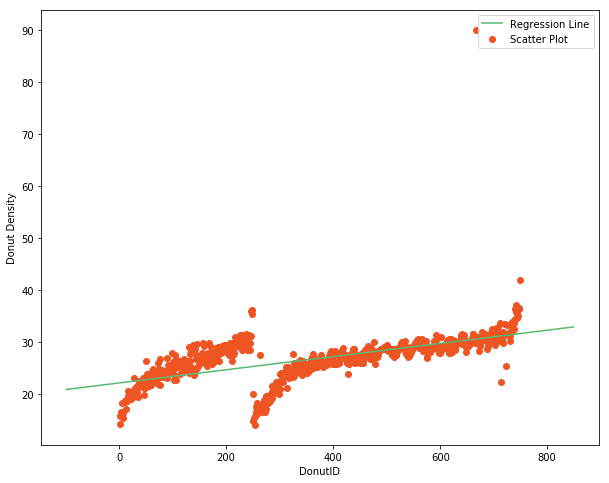

In [0]:
# Plotting the values and the Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('DonutID')
plt.ylabel('Donut Density')
#plt.xlim(-1,11) 
#plt.ylim(-100,1000000)
plt.legend()
plt.show()